# Wealth Distribution Dynamics

This is based on the QuantEcon lecture: https://python.quantecon.org/wealth_dynamics.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import quantecon as qe
from numba import njit, jitclass, float64, prange

### Lorenz curve on QuantEcon

Lorenz curve: a point $(x,y)$ on the curve gives the fraction $y$ of total wealth held by the fraction $x$ of the population. 

+ The Lorenz curve is 0 at 0 and 1 at 1.
+ Equality line: the Lorenz curve is the 45 degree line.
+ Large inequality, the Lorenz curve gets closer to the horizontal axis

Logonormal draws:
$x = e^{z}$ where $z \sim N(0,1)$

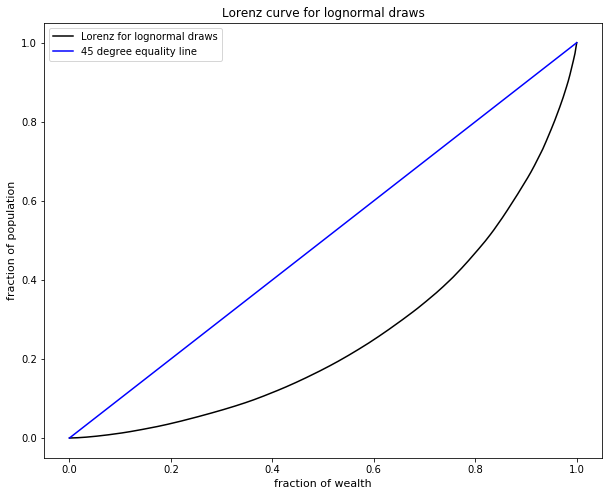

In [7]:
n = 300                                  # size of sample
x = np.exp(np.random.randn(n))         # exp of normal(0,1) draws gives lognormal

xvals, fvals = qe.lorenz_curve(x)      

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(xvals, fvals, 'k-', label='Lorenz for lognormal draws')
ax.plot(xvals, xvals, 'b-', label='45 degree equality line')
ax.set_title('Lorenz curve for lognormal draws') 
ax.set_xlabel(r'fraction of wealth', fontsize=11)
ax.set_ylabel(r'fraction of population', fontsize=11)
ax.legend(loc='upper left')
plt.show()

Pareto(a, m), where $a$ is the shape parameter and $m$ is the location parameter
+ pdf: $f(x) = \frac{am^a}{x^{a+1}}$
+ cdf: $F(x) = 1 - \left(\frac{m}{x}\right)^a$

### Gini coefficient on QuantEcon

The Gini coefficient is the ratio of the area between the Lorenz curve and the 45 degree line over the area below the 45 degree line.

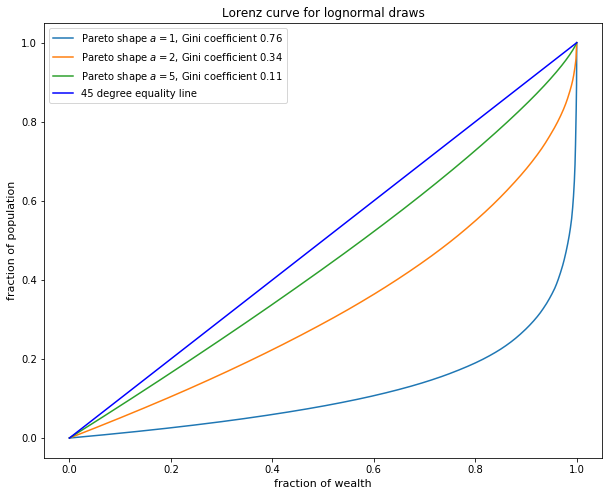

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

a_vals = (1, 2, 5) # different shape parameter values
m = 1              # location parameter
n = 3000            # sample size          

for a in a_vals:
    x = (np.random.pareto(a, n) + 1) * m
    Gini = qe.gini_coefficient(x)
    Gini = float("{0:.2f}".format(Gini)) # to keep only two decimals
    xvals, fvals = qe.lorenz_curve(x)
    ax.plot(xvals, fvals, label=f'Pareto shape $a ={a}$, Gini coefficient %s' %Gini)

ax.plot(xvals, xvals, 'b-', label='45 degree equality line')
ax.set_title('Lorenz curve for lognormal draws') 
ax.set_xlabel(r'fraction of wealth', fontsize=11)
ax.set_ylabel(r'fraction of population', fontsize=11)
ax.legend(loc='upper left')
plt.show()

The higher is the shape parameter $a$, the flatter is the tail and the lower is the inequality, the lower is the Gini coefficient.